# Can development practices influence developers' job satisfaction?

## A brief analysis of the StackOverflow developer survey 2019

At my current organisation all code is unit tested and every pull request must be reviewed by at least one other member of the development team. This, from my point of view, has lead to a good standard of code in our codebase, which makes adding new features or refactoring much easier than at old jobs.

My hypothesis is that these organisational decisions impact developer job satisfaction across the industry.

I'm going to be using the results of the [StackOverflow developer survey 2019](https://insights.stackoverflow.com/survey) to investigate my hypothesis.

In [1]:
import pandas

df = pandas.read_csv('./data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [2]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

Since I'm looking at how unit testing and reviewing code affect job satisfaction, the columns I'm interested in here are `UnitTests`, `CodeRev`, `CodeRevHrs`, and `JobSat`.

I'm also going to throw in `ConvertedComp` for good measure, as I get the feeling well paid developers are also more likely to be happy developers.

In [3]:
df = df[['UnitTests', 'CodeRev', 'CodeRevHrs', 'ConvertedComp', 'JobSat']]
df.head()

,UnitTests,CodeRev,CodeRevHrs,ConvertedComp,JobSat
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,"No, but I think we should",No,NaN,8820.0,Slightly satisfied
3,"No, but I think we should",No,NaN,61000.0,Slightly satisfied
4,"Yes, it's part of our process","Yes, because I see value in code review",NaN,NaN,Slightly dissatisfied


### Unit tests

First, I'll focus on the relationship between organisations encouraging unit testing, and developer satisfaction.

In [4]:
df['JobSat'].value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

For several of these tests, I'm going to require a numerical representation of developer satisfaction.

Since the levels of satisfaction range from very dissatisfied to very satisfied, I'm going to convert directly from the categories to integers in the range 1-5 inclusive; where 1 is a very dissatisfied developer, and 5 is a very satisfied developer.

This column of numerical satisfaction levels will be called `JobSatNum`.

In [5]:
numerical_satisfactions = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}

def get_numerical_satisfaction(row):
    """
    get a numerical representation of a job satisfaction for a row
    """
    return numerical_satisfactions.get(row['JobSat'])

df['JobSatNum'] = df.apply(get_numerical_satisfaction, axis=1)

df.head()

,UnitTests,CodeRev,CodeRevHrs,ConvertedComp,JobSat,JobSatNum
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,"No, but I think we should",No,NaN,8820.0,Slightly satisfied,4.0
3,"No, but I think we should",No,NaN,61000.0,Slightly satisfied,4.0
4,"Yes, it's part of our process","Yes, because I see value in code review",NaN,NaN,Slightly dissatisfied,2.0


I'll calculate mean job satisfaction levels for each of the categories in the answers for `UnitTests`.

I'll create a new dataframe as the subset of `df` where `JobSatNum` and `UnitTests` aren't missing, and calculate the mean job satisfaction for each of the unit test responses.

In [6]:
unit_test_df = df[['UnitTests', 'JobSatNum']].dropna()
unit_test_df.head()

,UnitTests,JobSatNum
2,"No, but I think we should",4.0
3,"No, but I think we should",4.0
4,"Yes, it's part of our process",2.0
5,"Yes, it's not part of our process but the deve...",4.0
8,"Yes, it's not part of our process but the deve...",4.0


In [7]:
unit_test_means = unit_test_df.groupby('UnitTests').mean()
unit_test_means

,JobSatNum
UnitTests,
"No, and I'm glad we don't",3.713874
"No, but I think we should",3.419529
"Yes, it's not part of our process but the developers do it on their own",3.723459
"Yes, it's part of our process",3.865377


Plotting these values on a bar chart will result in some rather unpleasant category labels, so first I'll wrap the labels at 20 characters.

In [8]:
from textwrap import wrap

new_indexes = []
for index in unit_test_means['JobSatNum'].index:
    new_indexes.append('\n'.join(wrap(index, 20)))

unit_test_means = pandas.Series(unit_test_means['JobSatNum'].values, new_indexes)
unit_test_means.head()

No, and I'm glad we\ndon't                                                    3.713874
No, but I think we\nshould                                                    3.419529
Yes, it's not part\nof our process but\nthe developers do it\non their own    3.723459
Yes, it's part of\nour process                                                3.865377
dtype: float64

Then I'll plot them on a bar chart.

Text(0, 0.5, 'Mean job satisfaction')

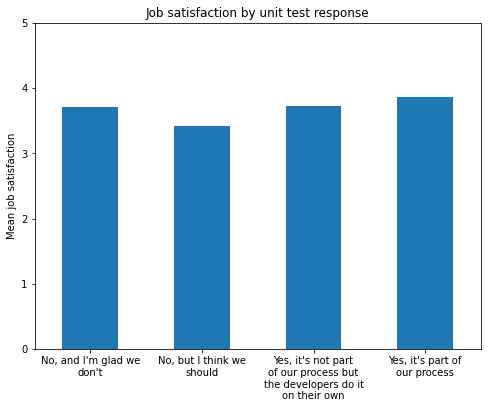

In [9]:
ax = unit_test_means.plot.bar(figsize=(8, 6), ylim=(0, 5), rot=0)
ax.set_title('Job satisfaction by unit test response')
ax.set_ylabel('Mean job satisfaction')

The mean job satisfaction of developers at organisations that  review other developers code as part of their process is very slightly higher than those who don't; the difference is still not great however.

## Code reviews

In order to assess whether an organisation encouraging code reviews affects the job satisfaction of developers at that organisation, I'm first going to convert the responses to binary values, where 1 indicates that a developer reviews code as a part of their job, and 0 indicates they don't.

In [10]:
code_review_responses = {
    'No': 0,
    'Yes, because I see value in code review': 1,
    'Yes, because I was told to do so': 1
}


def get_binary_code_review(row):
    """
    get a binary representation of a whether a developer reviews code for a row
    """
    return code_review_responses.get(row['CodeRev'])

df['CodeRevBin'] = df.apply(get_binary_code_review, axis=1)

df.head()

,UnitTests,CodeRev,CodeRevHrs,ConvertedComp,JobSat,JobSatNum,CodeRevBin
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"No, but I think we should",No,NaN,8820.0,Slightly satisfied,4.0,0.0
3,"No, but I think we should",No,NaN,61000.0,Slightly satisfied,4.0,0.0
4,"Yes, it's part of our process","Yes, because I see value in code review",NaN,NaN,Slightly dissatisfied,2.0,1.0


Now I can create a subset of the dataframe to analyses whether reviewing code at work influences job satisfaction.

In [11]:
code_review_df = df[['CodeRevBin', 'JobSatNum']].dropna()
code_review_df.head()

,CodeRevBin,JobSatNum
2,0.0,4.0
3,0.0,4.0
4,1.0,2.0
5,0.0,4.0
6,1.0,3.0


Grouping by whether or not developers review code and calculating the mean job satisfactions gives:

In [12]:
code_rev_means = code_review_df.groupby('CodeRevBin').mean()
code_rev_means.head()

,JobSatNum
CodeRevBin,
0.0,3.533623
1.0,3.733245


I can then convert the 1/0 values to Yes/No

In [13]:
code_rev_means = pandas.Series(code_rev_means['JobSatNum'].values, ['No', 'Yes'])
code_rev_means.head()

No     3.533623
Yes    3.733245
dtype: float64

Text(0, 0.5, 'Mean job satisfaction')

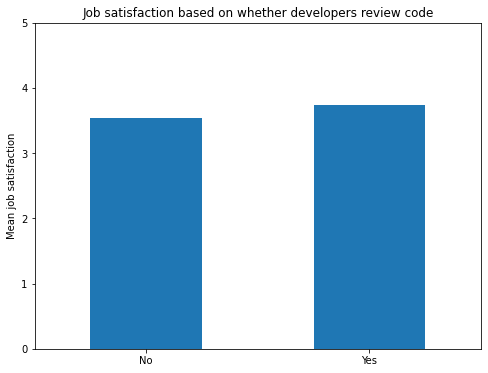

In [14]:
ax = code_rev_means.plot.bar(figsize=(8, 6), ylim=(0, 5), rot=0)
ax.set_title('Job satisfaction based on whether developers review code')
ax.set_ylabel('Mean job satisfaction')